In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
em = np.load('sent_transformer_embeddings.npz')
sBert_em = [em[f] for f in em.files]

In [13]:
# PCA
em_output_reduced = []
pca = PCA(n_components=30)
pca.fit(sBert_em)
em_output_reduced = pca.transform(sBert_em)

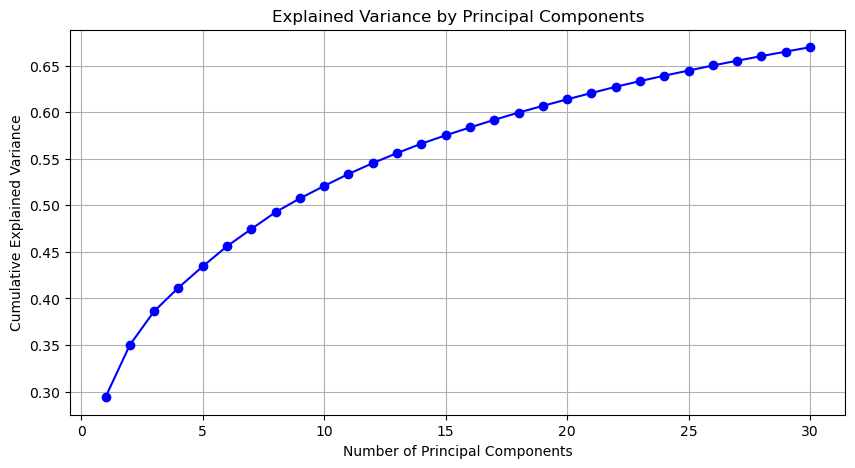

In [15]:
# plot explained variance by Principal Components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [16]:
# kmeans clustering
from sklearn.cluster import KMeans

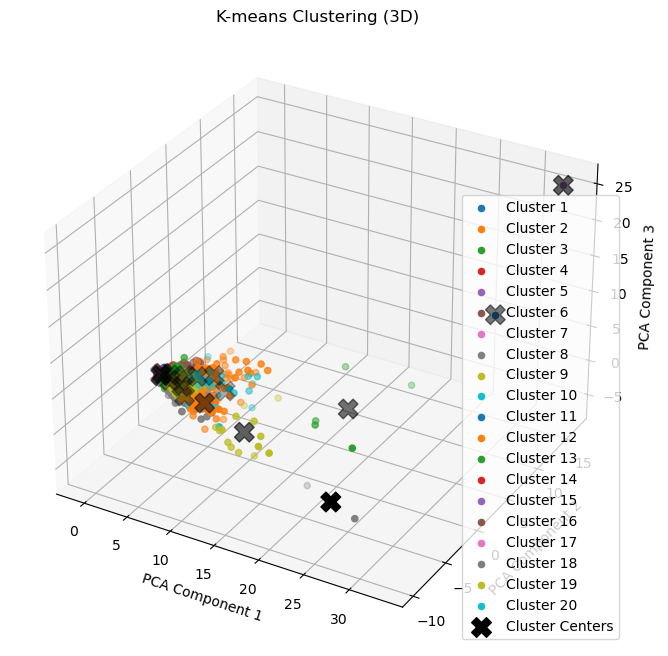

In [17]:
# Specify the number of clusters 
n_clusters = 20

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(em_output_reduced)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot the data points with color-coded cluster assignments
for cluster_id in range(n_clusters):
    ax.scatter(em_output_reduced[cluster_labels == cluster_id, 0],
               em_output_reduced[cluster_labels == cluster_id, 1],
               em_output_reduced[cluster_labels == cluster_id, 2],
               label=f'Cluster {cluster_id + 1}')

# Plot cluster centers in 3D
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           kmeans.cluster_centers_[:, 2],
           s=200, c='black', marker='X', label='Cluster Centers')

ax.set_title('K-means Clustering (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.grid(True)
plt.show()

In [21]:
# K-means clustering with more clusters
n_clusters200 = 200
kmeans = KMeans(n_clusters=n_clusters200, random_state=42)
cluster_labels200 = kmeans.fit_predict(em_output_reduced)

# Create a new array with embeddings and cluster labels
sBert_em_with_labels = np.column_stack((sBert_em, cluster_labels))